Q1

The mathematical formula for a linear Support Vector Machine (SVM) can be expressed as:

\[f(x) = w \cdot x + b\]

Here:
- \(f(x)\) represents the decision function that classifies input data points.
- \(w\) is the weight vector.
- \(x\) is the input feature vector.
- \(b\) is the bias or intercept term.

The SVM aims to find the optimal \(w\) and \(b\) to create a decision boundary that maximizes the margin between different classes of data points.

Q2

The objective function of a linear Support Vector Machine (SVM) is to maximize the margin between different classes of data points while minimizing the classification error. This can be formulated as:

min_{w,b} ||w||/2

subject to:

y*(w^t*x+b)>=1

Here:
- \(w\) is the weight vector.
- \(b\) is the bias or intercept term.
- \(y_i\) is the class label of the data point \(x_i\).
- The objective is to find the optimal \(w\) and \(b\) that define the decision boundary while ensuring that all data points are correctly classified and that the margin is maximized.

Q3 

The kernel trick in Support Vector Machines (SVM) is a technique that allows SVMs to handle non-linearly separable data by implicitly mapping the input data into a higher-dimensional feature space without explicitly computing and storing the transformed feature vectors. This is achieved by replacing the dot product between data points in the input space with a kernel function, which calculates the dot product in the higher-dimensional space.

Mathematically, instead of computing \(w \cdot x\) directly, the kernel trick allows you to compute \(K(x, x')\) where \(K\) is the kernel function, and \(x\) and \(x'\) are data points. Common kernel functions include the polynomial kernel and the radial basis function (RBF) kernel. This transformation allows SVMs to create non-linear decision boundaries and effectively classify data that cannot be separated linearly in the original feature space.

Q4

The support vectors in a Support Vector Machine (SVM) are the data points that are closest to the decision boundary, and they play a crucial role in defining the decision boundary and the margin. These support vectors support and determine the optimal hyperplane that maximizes the margin between different classes.

For example, let's say you have a binary classification problem with two classes, represented by red and blue points in a 2D feature space. The SVM's objective is to find the hyperplane that maximizes the margin between the two classes. In this case, the support vectors would be the data points that are closest to the decision boundary. These are the points that have the smallest margin or are on the margin itself.

The position of these support vectors determines the orientation and position of the decision boundary. The margin is computed as the distance between the support vectors and the decision boundary. By focusing on the support vectors, SVM can efficiently create a robust and optimal decision boundary, even in high-dimensional spaces or when dealing with non-linearly separable data using the kernel trick.

Q5


1. **Hyperplane**:
   - In a binary SVM, the hyperplane is the decision boundary that separates two classes.
   - In a 2D space, it's a straight line.
   - Example: If you're classifying apples (class A) and oranges (class B) based on their weight and color, the hyperplane might be the line that best separates the two classes.

2. **Marginal Plane**:
   - The marginal plane in a SVM is the plane that is equidistant from the support vectors of both classes and parallel to the hyperplane.
   - In a 2D space, it's a pair of parallel lines.
   - Example: If the support vectors for apples and oranges are close to the decision boundary, the marginal plane would be drawn between them, forming a margin.

3. **Hard Margin**:
   - A hard margin SVM aims to find a hyperplane that perfectly separates the two classes without any misclassifications.
   - Example: If it's possible, in the case of perfectly separable data, a hard margin SVM draws the hyperplane with a maximum margin between the two classes and no data points in the margin.

4. **Soft Margin**:
   - A soft margin SVM allows for some misclassifications to find a more robust decision boundary, especially when data is not perfectly separable.
   - Example: If the apples and oranges are mixed in a way that a perfect separation is not possible, a soft margin SVM allows for a few misclassified fruits to find a decision boundary with a smaller margin but better generalization to unseen data.

Unfortunately, I can't provide visual representations directly, but you can easily find graphical illustrations of these concepts by searching for "SVM hyperplane," "SVM margin," "SVM hard margin," and "SVM soft margin" on the internet to see how they look in practice.

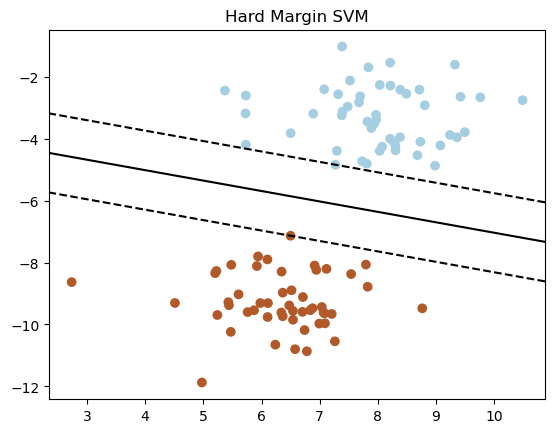

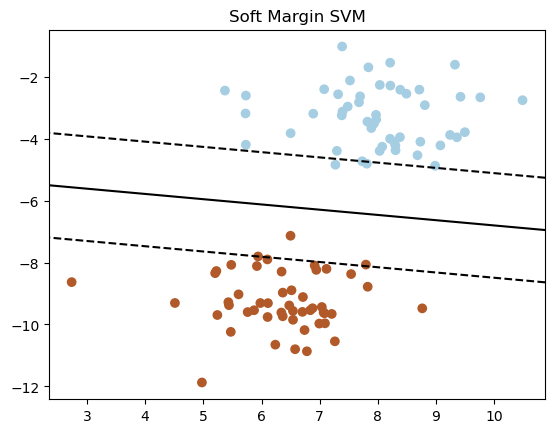

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Create a sample dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Create a hard margin SVM
hard_margin_svm = svm.SVC(kernel='linear', C=1000)  # C is a large value for a hard margin
hard_margin_svm.fit(X, y)

# Create a soft margin SVM
soft_margin_svm = svm.SVC(kernel='linear', C=0.1)  # C is a small value for a soft margin
soft_margin_svm.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary for the hard margin SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = hard_margin_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.title('Hard Margin SVM')
plt.show()

# Plot the decision boundary for the soft margin SVM
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
Z = soft_margin_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.title('Soft Margin SVM')
plt.show()


Q6

# IRIS Dataset #


In [4]:
#load dataset
from sklearn.datasets import load_iris
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
X=data.data
y=data.target
print(X.shape,y.shape)


(150, 4) (150,)


In [8]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [9]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)


SVC()

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21  0  0]
 [ 0 16  0]
 [ 0  1  7]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      1.00      0.97        16
           2       1.00      0.88      0.93         8

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45



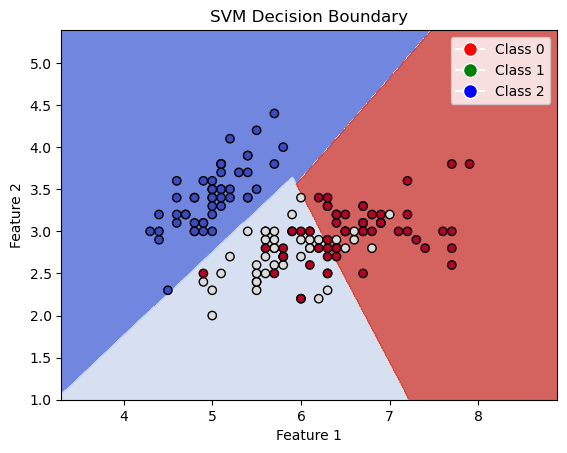

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for visualization
y = iris.target

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1)  # Linear kernel

# Fit the classifier to the data
clf.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

# Create a legend
legend1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Class 0')
legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Class 1')
legend3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Class 2')
plt.legend(handles=[legend1, legend2, legend3])

plt.show()


In [24]:

C_param=np.arange(1,10)
accuracy=[]
for c in C_param:
    classifier=SVC(C=c)
    classifier.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,classifier.predict(X_test)))

In [26]:
import pandas as pd
df=pd.DataFrame(data={'C':C_param,'Accuracy_Score':accuracy})
df

,C,Accuracy_Score
0,1,0.977778
1,2,0.977778
2,3,0.955556
3,4,0.933333
4,5,0.955556
5,6,0.955556
6,7,0.955556
7,8,0.955556
8,9,0.977778


<AxesSubplot:xlabel='C', ylabel='Accuracy_Score'>

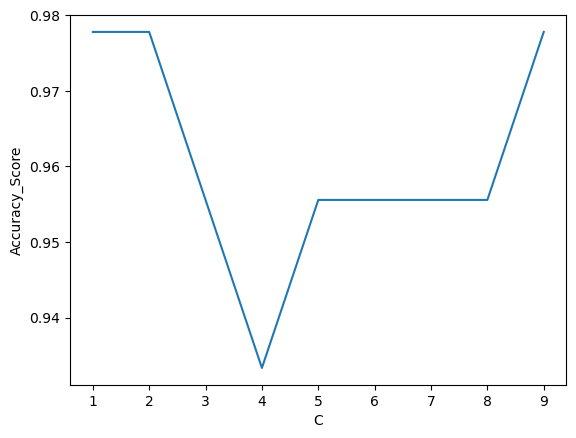

In [30]:
import seaborn as sns
sns.lineplot(x=df['C'],y=df['Accuracy_Score'])

# Bonus Task #

In [31]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.num_epochs):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.w) - self.b) >= 1:
                    self.w -= self.learning_rate * (2 * self.C * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.C * self.w - np.dot(X[i], y[i]))
                    self.b -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Generate some random data for testing
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1 if i > 0 else -1 for i in X[:, 0]])

# Create and fit the custom SVM
custom_svm = LinearSVM(learning_rate=0.01, num_epochs=1000, C=1.0)
custom_svm.fit(X, y)

# Compare with scikit-learn SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Make predictions
custom_predictions = custom_svm.predict(X)
sklearn_predictions = svm.predict(X)

# Compare the accuracy of custom and scikit-learn SVM
from sklearn.metrics import accuracy_score
custom_accuracy = accuracy_score(y, custom_predictions)
sklearn_accuracy = accuracy_score(y, sklearn_predictions)

print(f"Custom SVM Accuracy: {custom_accuracy}")
print(f"scikit-learn SVM Accuracy: {sklearn_accuracy}")



Custom SVM Accuracy: 0.64
scikit-learn SVM Accuracy: 0.98
